# How to change data type of a pandas series

In [4]:
import pandas as pd

In [2]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [3]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [4]:
drinks.dtypes    ##    beer_servins is int type

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [5]:
drinks['beer_servings'] = drinks.beer_servings.astype(float)  # we want to change it to float

In [6]:
drinks.dtypes    # it is changed

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [7]:


## How to change the data type when reading the file. or before reading it??

drinks = pd.read_csv('http://bit.ly/drinksbycountry', dtype = {'beer_servings':float})

In [9]:
drinks.dtypes  ## read again the file. we see that the dtype of beer_servings is changed to float

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [10]:
orders = pd.read_table('http://bit.ly/chiporders')

/Users/Latif/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [11]:
orders.head()   # here item_price includes $ and it is not integer. but to do math it is needed to be integer

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [14]:
orders.item_price.str.replace('$','').astype(float).mean()    # changed it then converted to float. and got mean.

7.464335785374397

In [18]:
orders.item_name.str.contains('Chicken').head() ### if you ewant to get this as 0-1 insted of Ture False:

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [21]:
orders.item_name.str.contains('Chicken').astype(int).head()

0    0
1    0
2    0
3    0
4    1
Name: item_name, dtype: int64

# when shoul I use groupby in pandas

In [22]:
import pandas as pd

In [23]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [24]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [26]:
drinks.beer_servings.mean()   # if we want to group the results by continent?

106.16062176165804

In [27]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [30]:
#  to see the rows of Africa only

drinks[drinks.continent=='Africa']     # if we want to get the mean of this

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,Africa
4,Angola,217,57,45,5.9,Africa
18,Benin,34,4,13,1.1,Africa
22,Botswana,173,35,35,5.4,Africa
26,Burkina Faso,25,7,7,4.3,Africa
27,Burundi,88,0,0,6.3,Africa
28,Cote d'Ivoire,37,1,7,4.0,Africa
29,Cabo Verde,144,56,16,4.0,Africa
31,Cameroon,147,1,4,5.8,Africa
33,Central African Republic,17,2,1,1.8,Africa


In [31]:
drinks[drinks.continent=='Africa'].mean()   # mean of the results of Africa only

beer_servings                   61.471698
spirit_servings                 16.339623
wine_servings                   16.264151
total_litres_of_pure_alcohol     3.007547
dtype: float64

In [33]:
drinks[drinks.continent=='Africa'].beer_servings.mean()  # beer_servings mean of Africa

61.471698113207545

In [35]:
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [36]:
drinks.beer_servings.max()

376

In [37]:
drinks.groupby('continent').beer_servings.min()

continent
Africa            0
Asia              0
Europe            0
North America     1
Oceania           0
South America    93
Name: beer_servings, dtype: int64

In [39]:
# if we want to see more than one agg statistical values?
drinks.groupby('continent').beer_servings.agg(['count','min', 'max','mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [40]:
drinks.mean()     # means of all columns

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [41]:
drinks.groupby('continent').mean()    # means of all columns grouped by continent

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [7]:
%matplotlib inline

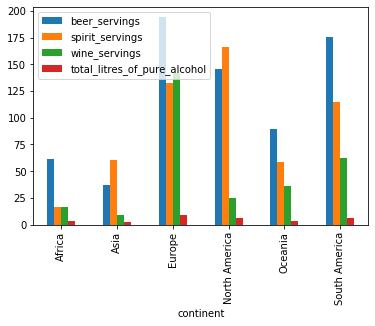

In [43]:
drinks.groupby('continent').mean().plot(kind='bar')

# How to explore a pandas series?

In [5]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [47]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [52]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [65]:
movies.genre.describe() # describe is a series method besides dataframe

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [66]:
movies.genre.value_counts()  # gives the number of every item in genres column 

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [67]:
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

In [71]:
type(movies.genre.value_counts(normalize=True))  # this is s series and we can use series methods

pandas.core.series.Series

In [72]:
movies.genre.value_counts().head()  # like this

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Name: genre, dtype: int64

In [74]:
movies.genre.unique()      # unique genres 

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [75]:
movies.genre.nunique()      # the NUMBER of unique genres 

16

In [80]:
# see a crosstab.  coss tables of two series, of genre and ratings

pd.crosstab(movies.genre, movies.content_rating)    # nums of rating of every genre

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [85]:
pd.crosstab(movies.genre, movies.duration.mean()).head()

col_0,120.97957099080695
genre,
Action,136
Adventure,75
Animation,62
Biography,77
Comedy,156


In [86]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [94]:
movies.duration.value_counts()

112    23
113    22
102    20
101    20
129    19
120    18
105    18
126    18
98     18
130    18
100    17
121    17
116    17
124    16
122    16
118    16
115    16
96     16
104    16
110    16
107    16
109    16
119    15
114    15
99     15
108    15
94     14
117    14
106    14
93     14
       ..
70      1
69      1
67      1
66      1
242     1
238     1
195     1
229     1
224     1
220     1
216     1
212     1
207     1
205     1
202     1
201     1
200     1
194     1
159     1
193     1
187     1
186     1
184     1
183     1
182     1
180     1
177     1
168     1
166     1
64      1
Name: duration, Length: 133, dtype: int64

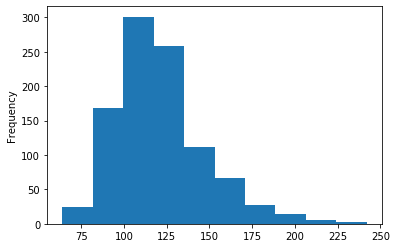

In [8]:
movies.duration.plot(kind='hist')  

In [ ]:
movies.duration.plot(kind='hist')  kind

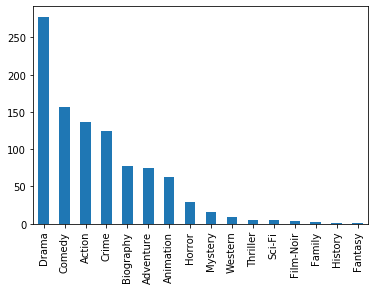

In [97]:
movies.genre.value_counts().plot(kind='bar')